##### Data Analysis - Coursework 2 (50%)
# Analysing gravitational wave signals 
## Deadline Friday week 11, 2pm.

#### Instructions

This coursework assesses learning outcomes from **all Chapters** of the course, but in particular **Chapters 6, 7, 8 and 9**. It is worth 50% of the module. Please ensure you have read the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2022/blob/master/blended_exercises/Chapter8/Chapter8.ipynb) before starting this coursework. 

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a html file. **Don't forget to click `run all` before you export it**. You can constantly update this document until the deadline.
- The breakdown of the assessment criteria is provided in Learning Central under Assessment.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- Please also take note of the University’s policy on **plagiarism**, which is outlined in your student handbook.

#### Tips


- Explain all your reasoning for each step. A *significant fraction* of the marks are given for explanations and discussion, as they evidence understanding of the analysis.  
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements at the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may need to do some additional research into this subject. You may find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

***

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from scipy import stats
import numpy as np

## Part A - Some background [15 marks]

**Answer:**

Scientists know that the gravitational waves from GW150914 were due to two black holes merging as the signal was identified as a binary black hole merger by matching up with simulated data from einstein theory.

As the two objects spiral in on each other, they begin to gain angular momentum. At the same time they loose energy to gravitational waves. The dopler effect as the objects move towards us and away from us again casuses the signal amplitude we recieve to be sinusoidal. As the objects get closer, both the amplitude and frequency of the signal increases at an increasing rate up until the merger. At this point the GW sigfnal is at its maximum. As spacetime adjusts back to a steady state we recievce a slight short aftershock in the signal, which is about an order of magnitude fainter than the maximum signal.

Download the file to my colab instance (that I have hosted on my Github, because you can't wget from LC as its behind sign in) 

In [2]:
!wget https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/gravitationalwaveevents.csv

--2022-12-12 21:51:46--  https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/gravitationalwaveevents.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1857 (1.8K) [text/plain]
Saving to: ‘gravitationalwaveevents.csv.22’

gravitationalwaveev 100%[===================>]   1.81K  --.-KB/s    in 0s      

2022-12-12 21:51:46 (14.8 MB/s) - ‘gravitationalwaveevents.csv.22’ saved [1857/1857]



Then i'm going to import the file and check some things about it, so the lenght of the data, the head, which is the first N values and all the headers

In [3]:
dataIn=pd.read_csv('/content/gravitationalwaveevents.csv')
print(f"#### length of data: {len(dataIn)}\n\n")
dataIn.head(8)

#### length of data: 42




,Unnamed: 0,idx,DL,DL_err,Mtot,Mtot_err,Mchirp,Mchirp_err
0,0,0,430.0,170.0,63.1,3.0,28.6,1.5
1,1,1,1060.0,480.0,35.7,3.8,15.2,1.1
2,2,2,440.0,190.0,20.5,1.5,8.9,0.3
3,3,3,960.0,410.0,49.1,3.9,21.5,1.7
4,4,4,320.0,110.0,17.8,0.7,7.9,0.2
5,5,5,2750.0,1320.0,80.3,10.2,35.7,4.7
6,6,6,990.0,380.0,56.4,3.7,25.0,1.6
7,7,7,580.0,210.0,53.4,2.4,24.2,1.1


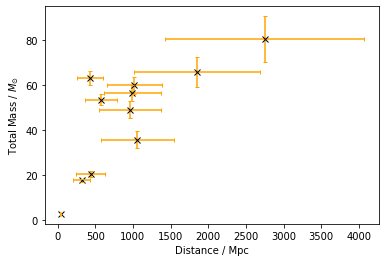

In [4]:
plt.plot(dataIn["DL"],dataIn["Mtot"],  "kx")
plt.errorbar(dataIn["DL"], dataIn["Mtot"],
             yerr=dataIn["Mtot_err"], xerr=dataIn["DL_err"], 
             fmt="none", 
             ecolor="orange", 
             capsize=2)

plt.ylabel("Total Mass / $M_{\odot}$")
plt.xlabel("Distance / Mpc")
plt.show()
print("\n\n\n")

We are given the mass and distance in solar masses, so lets convert this into SI units, and put some logarithmic scales to make the correlation linear

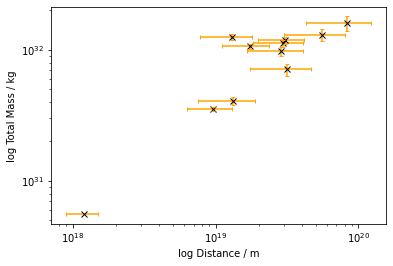

In [5]:
DL = dataIn["DL"]*3e16 #meters
DL_err = dataIn["DL_err"]*3e16 #meters

Mtot = dataIn["Mtot"]*1.99e30 #kg
Mtot_err = dataIn["Mtot_err"]*1.99e30 #kg



plt.plot(DL,Mtot,  "kx")
plt.errorbar(DL, Mtot,
             yerr=Mtot_err, xerr=DL_err, 
             fmt="none", 
             ecolor="orange", 
             capsize=2)

plt.ylabel("log Total Mass / kg")
plt.xlabel("log Distance / m")

plt.yscale("log")
plt.xscale("log")
plt.show()
print("\n\n\n")

The plot now shows there is a positive logarithmic correlation between the size of the mass and the distance of GW events measured. 

***

## Part B - The data [15 marks]

**Answer:**

Lets download the next file from my github

In [6]:
!wget https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/Observedwaveform.csv

--2022-12-12 21:51:47--  https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/Observedwaveform.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26465 (26K) [text/plain]
Saving to: ‘Observedwaveform.csv.22’

Observedwaveform.cs 100%[===================>]  25.84K  --.-KB/s    in 0.002s  

2022-12-12 21:51:47 (12.1 MB/s) - ‘Observedwaveform.csv.22’ saved [26465/26465]



and check out the head, and then plot the data

In [7]:
obsIn=pd.read_csv('/content/Observedwaveform.csv')
print(f"#### length of data: {len(obsIn)}\n\n")
obsIn.head(8)

#### length of data: 636




,strain,time (s)
0,8.101405e-23,1.205952e+09
1,1.019082e-22,1.205952e+09
2,1.226521e-22,1.205952e+09
3,1.396412e-22,1.205952e+09
4,1.522380e-22,1.205952e+09
5,1.633110e-22,1.205952e+09
6,1.775375e-22,1.205952e+09
7,1.983757e-22,1.205952e+09


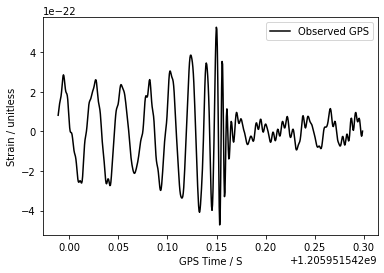

In [8]:
s_obs = obsIn["strain"]
t_obs_gps = obsIn["time (s)"]

plt.plot(t_obs_gps,s_obs,"k", label="Observed GPS")
plt.xlabel("GPS Time / S")
plt.ylabel("Strain / unitless")
plt.legend()
plt.show()
print("\n\n\n")

The beginning of the sample begins at zero, rather than the GW event occuring at zero. As we are told that the GPS time of the merger for your waveform is 1205951542.153363s, this means we can shift the data so that it is comparable with other samples

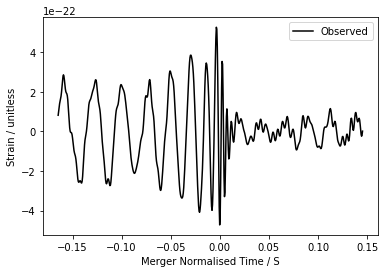

In [9]:
t_obs = t_obs_gps - 1205951542.153363

plt.plot(t_obs,s_obs,"k", label="Observed")
plt.xlabel("Merger Normalised Time / S")
plt.ylabel("Strain / unitless")
plt.legend()
plt.show()
print("\n\n\n")

We can get a pure noise sample by taking data from after the GW has occurred. We need to be sure to leave a short amount of time for the aftershock to subside, so we can't take a noise profile directly from 0s.

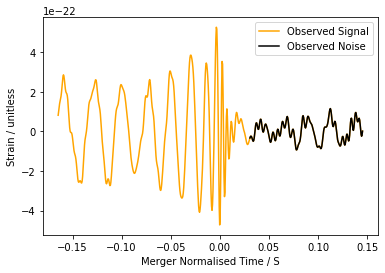

In [10]:
plt.plot(t_obs,s_obs,"orange", label = "Observed Signal")

purge = 400

plt.plot(t_obs[purge:],s_obs[purge:],"k", label = "Observed Noise")

plt.legend()

plt.xlabel("Merger Normalised Time / S")
plt.ylabel("Strain / unitless")
plt.show()
print("\n\n\n")

If we purge everything except the last 400 samples, then we get a clean noise profile. This can be used to find our mean and standard deviation

In [11]:
noise_obs = s_obs[purge:]

mean_obs = noise_obs.mean()
std_obs = noise_obs.std()

print(f"Observed noise has mean {mean_obs:.4e} and standard deviation {std_obs:.4e}")

Observed noise has mean 2.1502e-24 and standard deviation 4.8026e-23


We can use this data to plot a distribution of our noise profile

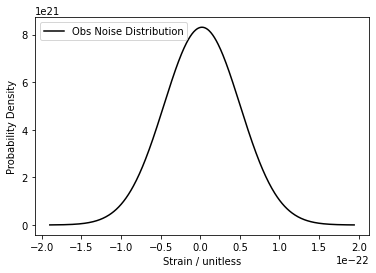

In [12]:
x = np.linspace(mean_obs-(4*std_obs), mean_obs+(4*std_obs), 500)
plt.plot(x ,stats.norm.pdf(x, mean_obs, std_obs), "k", label="Obs Noise Distribution")

plt.ylabel("Probability Density")
plt.xlabel("Strain / unitless")
plt.legend(loc="upper left")
plt.show()
print("\n\n\n")

This is not particularily useful however as the noise is averaged about zero, so any mean will give us approzimately zero and not a true noise level. By squaring every value of the noise (thus removing negatives), we can find the rms noise value which is a better description of noise amplitude

In [13]:
rms_obs = np.sqrt(np.mean(noise_obs**2))

print(f"Observed rms noise is {rms_obs:.4e}")

Observed rms noise is 4.7972e-23


***

## Part C - Interpolate reference model to match the observed data time sampling [15 marks]

**Answer:**

First lets get the file from github

In [14]:
!wget https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/mockData_Mtot40Msun_Dist1Mpc.csv

--2022-12-12 21:51:48--  https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/mockData_Mtot40Msun_Dist1Mpc.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18875 (18K) [text/plain]
Saving to: ‘mockData_Mtot40Msun_Dist1Mpc.csv.22’

mockData_Mtot40Msun 100%[===================>]  18.43K  --.-KB/s    in 0.002s  

2022-12-12 21:51:48 (11.1 MB/s) - ‘mockData_Mtot40Msun_Dist1Mpc.csv.22’ saved [18875/18875]



and then open it using pandas

In [15]:
mockIn=pd.read_csv('mockData_Mtot40Msun_Dist1Mpc.csv')
print(f"#### length of data: {len(mockIn)}\n\n")
mockIn.head(8)

#### length of data: 440




,strain,time (s)
0,1.545156e-19,-0.164658
1,1.171263e-19,-0.164170
2,1.082966e-19,-0.163681
3,1.389174e-19,-0.163193
4,2.190045e-19,-0.162704
5,1.252695e-19,-0.162216
6,2.021146e-19,-0.161728
7,1.249938e-19,-0.161240


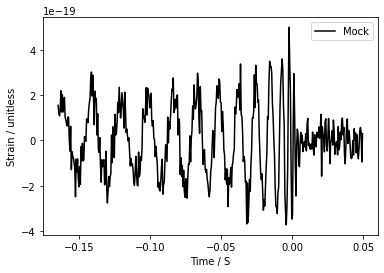

In [16]:
s_mock = mockIn["strain"]
t_mock = mockIn["time (s)"]

plt.plot(t_mock,s_mock,"k", label="Mock")
plt.xlabel("Time / S")
plt.ylabel("Strain / unitless")
plt.legend()
plt.show()
print("\n\n\n")

The waveform starts at some point $t_{min}$. Lets find it!

In [17]:
t_mock_min = np.min(t_mock)

print(f"Mock t_min = {t_mock_min:.4f}")

Mock t_min = -0.1647


Now we know this, lets discard all the t and s data we dont need from both the mock and observed arrays so they are the same length. While we can use any of the three options for defining the truth array, using only numpy functions to work with numpy arrays is both faster, and friendlier for external compilers to parse such as numba

In [18]:
print(f"original observed time array shape = {t_obs.shape}")
#truth_array = np.logical_and(t_mock_min<t_obs, t_obs<=0)
#truth_array = np.where((t_mock_min<t_obs)&(t_obs<=0))[0]
truth_array = np.where(np.logical_and(t_mock_min<t_obs, t_obs<=0))[0]
t_obs = t_obs[truth_array]
s_obs = s_obs[truth_array]
print(f"truncated observed time array shape = {t_obs.shape}")

print(f"original mock time array shape = {t_mock.shape}")
#truth_array = t_mock<=0
truth_array = np.where(t_mock<=0)[0]
t_mock = t_mock[truth_array]
s_mock = s_mock[truth_array]
print(f"truncated mock time array shape = {t_mock.shape}")
print(f"does {t_mock.shape} = {t_obs.shape}? {t_mock.shape==t_obs.shape}")

original observed time array shape = (636,)
truncated observed time array shape = (337,)
original mock time array shape = (440,)
truncated mock time array shape = (338,)
does (338,) = (337,)? False


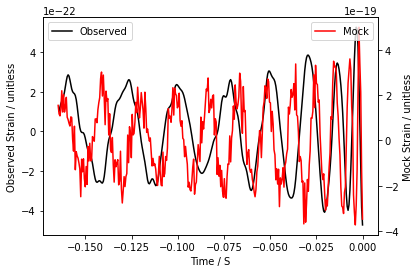

In [19]:
plt.plot(t_obs,s_obs,"k", label="Observed")
plt.ylabel("Observed Strain / unitless")
plt.legend(loc="upper left")
plt.xlabel("Time / S")

plt.twinx()
plt.plot(t_mock,s_mock,"r", label="Mock")
plt.ylabel("Mock Strain / unitless")
plt.legend(loc="upper right")
plt.show()
print("\n\n\n")

Because the two are orders of magnitude different in strain, i needed to plot them using two seperate y axis, but you can see they are now matching in the time axis range, although they do not have the same $\Delta t$

Lets get the reference file from github

In [20]:
!wget https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/reference_Mtot40Msun_Dist1Mpc.csv

--2022-12-12 21:51:48--  https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/reference_Mtot40Msun_Dist1Mpc.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 997473 (974K) [text/plain]
Saving to: ‘reference_Mtot40Msun_Dist1Mpc.csv.22’

reference_Mtot40Msu 100%[===================>] 974.09K  --.-KB/s    in 0.06s   

2022-12-12 21:51:49 (16.3 MB/s) - ‘reference_Mtot40Msun_Dist1Mpc.csv.22’ saved [997473/997473]



In [21]:
refIn=pd.read_csv('reference_Mtot40Msun_Dist1Mpc.csv')
print(f"#### length of data: {len(refIn)}\n\n")
refIn.head(8)

#### length of data: 24622




,strain,time (s)
0,-6.162294e-20,-11.946102
1,-6.140841e-20,-11.945614
2,-6.113607e-20,-11.945126
3,-6.080617e-20,-11.944637
4,-6.041902e-20,-11.944149
5,-5.997498e-20,-11.943661
6,-5.947447e-20,-11.943172
7,-5.891795e-20,-11.942684


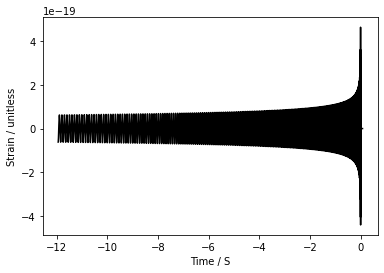

In [22]:
s_ref = refIn["strain"]
t_ref = refIn["time (s)"]

plt.plot(t_ref,s_ref,"k")
plt.xlabel("Time / S")
plt.ylabel("Strain / unitless")
plt.show()
print("\n\n\n")

This data has many more datapoints than the other two, also we can see that it has no noise if we zoom in and check after t=0

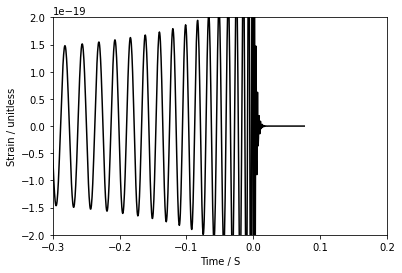

In [23]:
plt.plot(t_ref,s_ref,"k")
plt.xlabel("Time / S")
plt.ylabel("Strain / unitless")

plt.xlim(-0.3,0.2)
plt.ylim(-2e-19,2e-19)
plt.show()
print("\n\n\n")

Lets change the sample rate of the reference to match that of the observed data

In [24]:
from scipy.interpolate import interp1d

# get interpolation object using a reference waveform with ref_x (time) and ref_y (strain).
interp_fn = interp1d(t_ref,s_ref,bounds_error=False)
# now interpolate the data waveform
s_ref_interp = interp_fn(t_mock)

print(f"truncated mock strain array shape = {s_mock.shape}")
print(f"interpolated reference strain array shape = {s_ref_interp.shape}")
print(f"does {s_mock.shape} = {s_ref_interp.shape}? {s_mock.shape==s_ref_interp.shape}")

truncated mock strain array shape = (338,)
interpolated reference strain array shape = (338,)
does (338,) = (338,)? True


Now lets plot this data aginst the mock data to confirm that samples match up

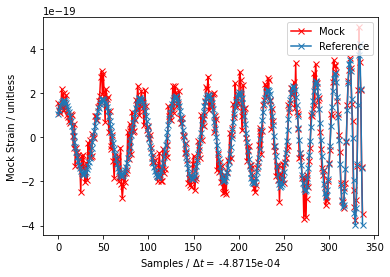

In [25]:
plt.plot(s_mock, "r-x",label="Mock")
plt.plot(s_ref_interp,"-x", label="Reference")
plt.ylabel("Mock Strain / unitless")
plt.legend(loc="upper right")
plt.xlabel(f"Samples / $\Delta t =$ {t_mock_min/len(s_mock):.4e}")
plt.show()
print("\n\n\n")

This is hard to tell lets zoom in 

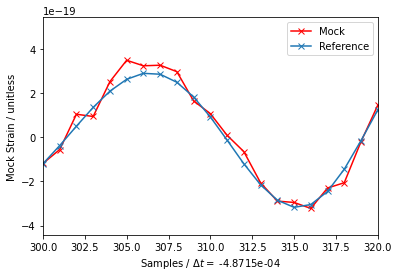

In [26]:
plt.plot(s_mock, "r-x",label="Mock")
plt.plot(s_ref_interp,"-x", label="Reference")
plt.ylabel("Mock Strain / unitless")
plt.legend(loc="upper right")
plt.xlabel(f"Samples / $\Delta t =$ {t_mock_min/len(s_mock):.4e}")
plt.xlim(300,320)
plt.show()
print("\n\n\n")

The interpolation has worked perfectly as the points are lined up with the data

***

## Part D - Using model waveforms to estimate the total mass and distance to the system "a by-eye estimate") [24 marks]

**Answer**

This reference waveform has $𝑀^\prime=40𝑀_{𝑠𝑢𝑛}$ , $𝐷^\prime=1Mpc$ and $𝑞=\frac{𝑀2}{𝑀1}=1$. 

Mathematically, we have an equal-mass system ($q=1$), if we want to create a waveform with total mass $M=M_1 + M_2$ at a distance $D=1Mpc$ (not spinning), then we can scale the strain $h(t,M,D)$ from a reference waveform with $M^\prime,D^\prime$ as:

$$
h(t,M,D) = \left(\dfrac{M}{M^\prime}\right) \left(\dfrac{D^\prime}{D}\right) ~ h(t^\prime) 
$$

where: 

$$ t^\prime=\left(\dfrac{M^\prime}{M}\right)t  $$

and $t=0$ is defined as being the time at which the merger occurred.

In [27]:
def scale_ref(t,M,D): #M_sun, Mpc
  M_prime, D_prime = 40, 1 #M_sun, Mpc
  tprime = (M_prime/M)*t
  hprime = interp_fn(tprime)
  s = (M/M_prime)*(D_prime/D)*hprime
  return np.array([t,s])

If I test the function with the same M and D as the interpolated reference, then I should get exactly the same result

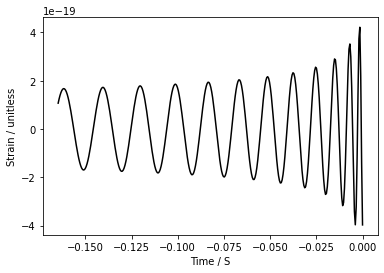

In [28]:
plt.plot(*scale_ref(t_mock,40,1),"k")
plt.xlabel("Time / S")
plt.ylabel("Strain / unitless")
plt.show()
print("\n\n\n")

This looks about the same but lets take the difference in strain and be sure. 

In [29]:
np.mean((s_ref_interp - scale_ref(t_mock,40,1)[1])**2)

0.0

Sum of squares is zero, so the two are identical, I can expect the function is working properly. 

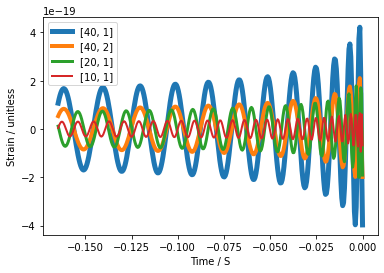

In [30]:
md_ = [[40,1,5],[40,2,4],[20,1,3],[10,1,2]]

for i in md_:
  plt.plot(*scale_ref(t_mock, *i[:2]),linewidth=i[2], label = i[:2])



plt.legend()
plt.xlabel("Time / S")
plt.ylabel("Strain / unitless")
plt.show()
print("\n\n\n")

Looks good

Lets test it against mockData_Mtot70Msun_Dist5Mpc.csv as it has known M and D values. First lets get the file

In [31]:
!wget https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/mockData_Mtot70Msun_Dist5Mpc.csv

--2022-12-12 21:51:50--  https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/mockData_Mtot70Msun_Dist5Mpc.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18783 (18K) [text/plain]
Saving to: ‘mockData_Mtot70Msun_Dist5Mpc.csv.21’

mockData_Mtot70Msun 100%[===================>]  18.34K  --.-KB/s    in 0.001s  

2022-12-12 21:51:50 (14.1 MB/s) - ‘mockData_Mtot70Msun_Dist5Mpc.csv.21’ saved [18783/18783]



In [32]:
mock2In=pd.read_csv('mockData_Mtot70Msun_Dist5Mpc.csv')
print(f"#### length of data: {len(mock2In)}\n\n")
mock2In.head(8)

#### length of data: 440




,strain,time (s)
0,-1.934524e-20,-0.164658
1,-4.436423e-20,-0.164170
2,-4.776572e-20,-0.163681
3,-4.637995e-20,-0.163193
4,-6.529435e-20,-0.162704
5,-6.439479e-20,-0.162216
6,-6.364858e-20,-0.161728
7,-6.772127e-20,-0.161240


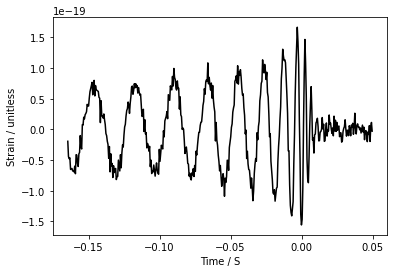

In [33]:
s_mock2 = mock2In["strain"]
t_mock2 = mock2In["time (s)"]

plt.plot(t_mock2,s_mock2,"k")
plt.xlabel("Time / S")
plt.ylabel("Strain / unitless")
plt.show()
print("\n\n\n")

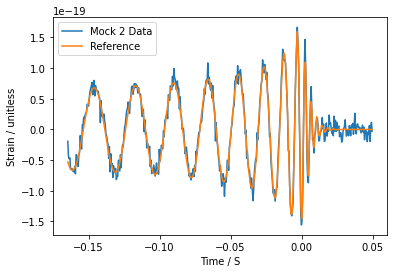

In [34]:
plt.plot(t_mock2,s_mock2, label="Mock 2 Data")
plt.plot(*scale_ref(t_mock2,70,5), label="Reference")

plt.legend()
plt.xlabel("Time / S")
plt.ylabel("Strain / unitless")
plt.show()
print("\n\n\n")

The fucntion fits the data really well

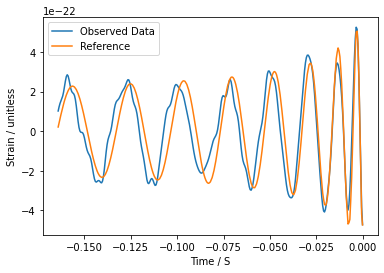

M guessed as 75 M_sol, D guessed as 1600 Mpc






In [35]:
M_guess,D_guess = 75,1600


plt.plot(t_obs,s_obs, label="Observed Data")
plt.plot(*scale_ref(t_obs,M_guess,D_guess), label="Reference")

plt.legend()
plt.xlabel("Time / S")
plt.ylabel("Strain / unitless")
plt.show()
print(f"M guessed as {M_guess} M_sol, D guessed as {D_guess} Mpc")
print("\n\n\n")

A by eye guess at the values of M=75$M_{sun}$ and D=1400Mpc match pretty perfectly with the initial mock data. Lets zoom in to confirm

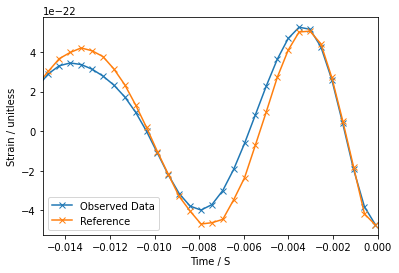

In [36]:
plt.plot(t_obs,s_obs, "x-",label="Observed Data")
plt.plot(*scale_ref(t_obs,M_guess,D_guess), "x-",label="Reference")

plt.legend()
plt.xlabel("Time / S")
plt.ylabel("Strain / unitless")
plt.xlim(-0.015,0)
plt.show()
print("\n\n\n")

Its not so good close up, but lets fix that with MCMC

***

## Part E - Estimating the total mass using MCMC [75 marks]

**Answer:**

Lets use MCMC to sample the total mass and distance and find the best values for our function that fit the data. First we need a function we are going to fit. This is easy, we will use the function generated earlier, but we will modify it to only take the inputs we want to vary to save the code from getting overly complex later. Then we need a set of initial values for the $\theta$ vector. We have these too, the values of M and D we guessed earlier

In [37]:
def scale_ref_mcmc(M,D): #M_sun, Mpc
  t = t_obs
  M_prime, D_prime = 40, 1 #M_sun, Mpc
  tprime = (M_prime/M)*t
  hprime = interp_fn(tprime)
  s = (M/M_prime)*(D_prime/D)*hprime
  return s

theta = np.array([M_guess,D_guess])

Now we need a metric to compare the goodness of fit of our theta values against our actual data for our likelihood. Lets use $\chi$ squared 

In [38]:
def posterior(theta):
  data = s_obs
  posterior = scale_ref_mcmc(*theta)
  #return np.sum((data-posterior)**2)
  return 0.5*np.sum((data-posterior)**2 / std_obs**2)

In [39]:
from tqdm.notebook import trange

In [40]:
# set up MCMC step paramaters
N_mcmc = 5000
theta_current = np.zeros([N_mcmc+1,2])
p_current = np.zeros(N_mcmc+1)

theta_current[0] = theta

# choose a value for width of normal distribution to get the step in seconds
sigma_m_mcmc = 0.1
sigma_d_mcmc = 5

for i in trange(N_mcmc):
    p_current[i] = posterior(theta_current[i]) # put in posterior equations
    dtheta = np.array([np.random.normal(0,sigma_m_mcmc),np.random.normal(0,sigma_d_mcmc)]) # randomally draw a value of theta to trial
    theta_proposed = theta_current[i] + dtheta #get new theta

    if theta_proposed[0] < 20:
      p_proposed = posterior([20,theta_proposed[1]])
    elif theta_proposed[0] > 100:
      p_proposed = posterior([100,theta_proposed[1]])
    if theta_proposed[1] <= 0:
      p_proposed = posterior([theta_proposed[0],1])

    p_proposed = posterior(theta_proposed)    
    #  keep value if probability proposed theta greater than the current prob
    if p_proposed < p_current[i]: 
        theta_current[i+1] = theta_proposed
    else:
    # if probability lower
    # use the ratios of probability to define probability of the move
        p_new_move = p_current[i]/p_proposed
        # generate random number for probability
        u_random = np.random.uniform(0,1)
        # if u_random < p_new_move, then accept, if not, reject
        if u_random >= p_new_move:
            theta_current[i+1] = theta_proposed
        else:
            theta_current[i+1] = theta_current[i]


  0%|          | 0/5000 [00:00<?, ?it/s]

Lets plot a walk

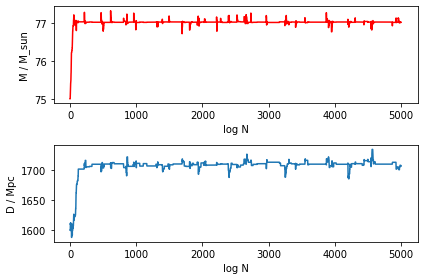

In [41]:
# let's generate the walk for plotting
x_mcmc=np.linspace(0,N_mcmc,N_mcmc+1)

fig, ax = plt.subplots(2, 1)
ax[0].plot(x_mcmc,theta_current[:,0], "r")
ax[0].set_xlabel('log N')
ax[0].set_ylabel('M / M_sun')

ax[1].plot(x_mcmc,theta_current[:,1])
ax[1].set_xlabel('log N')
ax[1].set_ylabel('D / Mpc')

fig.tight_layout()
plt.show()
print("\n\n\n")

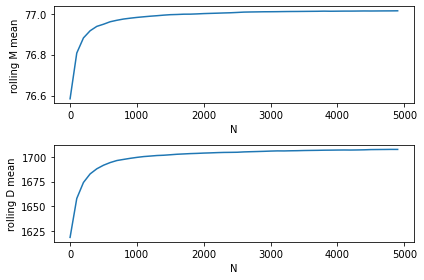

In [42]:
# going to work out means of subsets 
converge_test = int(N_mcmc/100)
converge_m_mean = np.zeros(converge_test)
converge_d_mean = np.zeros(converge_test)
c_x = np.zeros(converge_test)

for i in range(0,converge_test):
    converge_m_mean[i] = np.mean(theta_current[0:(i+1)*100,0])
    converge_d_mean[i] = np.mean(theta_current[0:(i+1)*100,1])
    c_x[i] = i*100


fig, ax = plt.subplots(2, 1)
ax[0].plot(c_x,converge_m_mean)
ax[0].set_xlabel('N')
ax[0].set_ylabel('rolling M mean')

ax[1].plot(c_x,converge_d_mean)
ax[1].set_xlabel('N')
ax[1].set_ylabel('rolling D mean')

fig.tight_layout()
print("\n\n\n")

The walks seem to be converging. Lets have a look at the distributions of the walk together

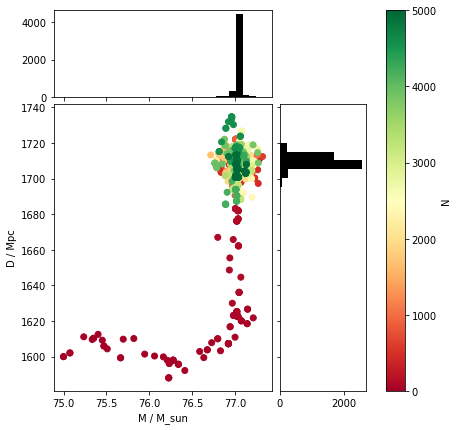

In [43]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7, 7))

# the scatter plot:
sc = ax.scatter(theta_current[:,0], theta_current[:,1], c=x_mcmc, cmap='RdYlGn')
ax.set_ylabel("D / Mpc")
ax.set_xlabel("M / M_sun")

cbar = plt.colorbar(sc)
cbar.set_label('N')

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

#then plot histograms
ax_histx.hist(theta_current[:,0], bins=30, color="k")
ax_histy.hist(theta_current[:,1], bins=30,orientation='horizontal', color="k")

plt.show()
print("\n\n\n")

This look like a good distribution, lets remove the burn in to be sure


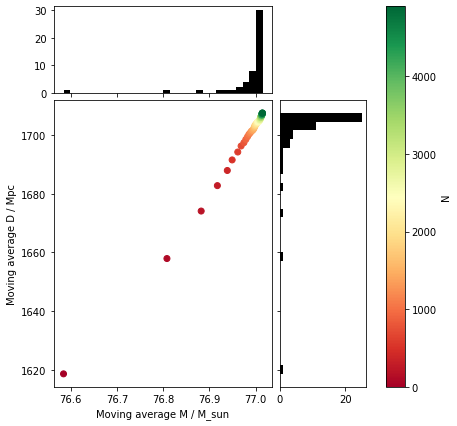

In [44]:
# going to work out means of subsets 
converge_test = int(N_mcmc/100)
converge_m_mean = np.zeros(converge_test)
converge_d_mean = np.zeros(converge_test)
c_x = np.zeros(converge_test)

for i in range(0,converge_test):
    converge_m_mean[i] = np.mean(theta_current[0:(i+1)*100,0])
    converge_d_mean[i] = np.mean(theta_current[0:(i+1)*100,1])
    c_x[i] = i*100


fig, ax = plt.subplots(figsize=(7, 7))

# the scatter plot:
sc = ax.scatter(converge_m_mean, converge_d_mean, c=c_x, cmap='RdYlGn')
ax.set_ylabel("Moving average D / Mpc")
ax.set_xlabel("Moving average M / M_sun")

cbar = plt.colorbar(sc)
cbar.set_label('N')

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

#then plot histograms
ax_histx.hist(converge_m_mean, bins=30, color="k")
ax_histy.hist(converge_d_mean, bins=30,orientation='horizontal', color="k")

plt.show()
print("\n\n\n")

This shows it is definitely more settled towards higher N. Lets take the first 2000 values as our burn in.

In [45]:
burn_in=2000

M = np.mean(theta_current[burn_in:,0])
D = np.mean(theta_current[burn_in:,1])
print(f"Mass {M:.4f} M_sun")
print(f"Distance {D:.4f} Mpc")

Mass 77.0249 M_sun
Distance 1710.2398 Mpc


Lets compare these to our guesses and to the data

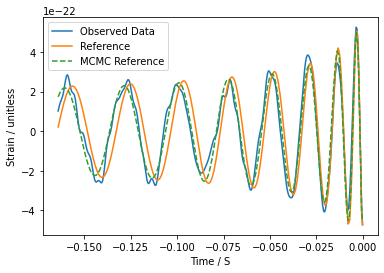

In [46]:
plt.plot(t_obs,s_obs, label="Observed Data")
plt.plot(*scale_ref(t_obs,M_guess,D_guess),"-", label="Reference")
plt.plot(*scale_ref(t_obs,M,D),"--", label="MCMC Reference")

plt.legend()
plt.xlabel("Time / S")
plt.ylabel("Strain / unitless")
plt.show()
print("\n\n\n")

The MCMC is a definite improvement over the initial guess, lets look at the numbers

In [47]:
print(f"p by eye = {np.abs(posterior([M_guess,D_guess])):.4e}")
print(f"p by mcmc = {np.abs(posterior([M,D])):.4e}")

p by eye = 7.9653e+02
p by mcmc = 1.5080e+02


The mcmc fit is closer to the actual data

***

## Part F - Putting it all together [36 marks]

**Answer:**

The chirp mass is given by 

$\mathscr{M}  = \frac{(m_1m_2)^{\frac{3}{5}}}{(m_1+m_2)^{\frac{1}{5}}}$

earlier, we assumed that $q=\frac{m_1}{m_2}=1$, so $\eta = 1/4$. Looking at the data, we can see that we get a constant amplitude for our sin signal. That verifies this assumption, as if there were mass disparities, then the larger object would produce a higher strain peak than the smaller one, resulting in a sin wave with an amplitude that repeats with f/2 frequency. As a result of this assumption the value for $\mathscr{M}$ simplifies to

$\mathscr{M} = (1/4)^{3/5}M$

In [48]:
M_chirp = ((1/4)**(3/5)) * M
print(f"the chirp mass is {M_chirp:.4f} M_sol")
print(f"the individual masses of both bodies are {M/2:.4f} M_sol each")

the chirp mass is 33.5271 M_sol
the individual masses of both bodies are 38.5125 M_sol each


Lets fit the period of the waveform around the peak. First lets isolate just over one wavelength nearest to the peak. The frequency changes pretty quickly so any more and the frequency would be off.

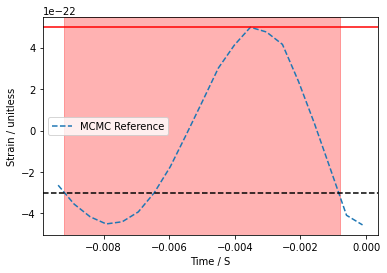

In [49]:
plt.plot(*scale_ref(t_obs,M,D)[:,-20:],"--", label="MCMC Reference")

plt.legend()
plt.xlabel("Time / S")
plt.ylabel("Strain / unitless")

plt.axhline(-3e-22, color="k", ls="--")
plt.axvspan(-0.0092,-0.0008, color="r",alpha=0.3)

plt.axhline(5e-22, color="r", ls="-")
plt.show()
print("\n\n\n")

Now lets fit a sin function to this. While I could use more mcmc I'd rather not, so we're going to use scipy. We first need to take a guess at some initial values, so lets look at the arbitrary dashed horizontal line on the graph and use it to find the period inbetween the shaded region. Then I used the red horizontal line to estimate the amplitude. Finally, at t=0, the wave is aproximately at a minimum, so we add a phase shift of -pi/2

In [50]:
d_T = 1/((-0.0008) - (-0.0092))
A = 5e-22
c = -np.pi/2

Now we have our estimates, lets fit

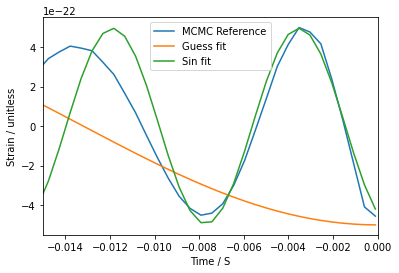

In [51]:
from scipy import optimize

def sin_(t, A, d_T, c):
  return A * np.sin(d_T*t + c)

popt, pcov = optimize.curve_fit(sin_, *scale_ref(t_obs,M,D)[:,-20:], [A,d_T,c])

plt.plot(*scale_ref(t_obs,M,D),"-", label="MCMC Reference")
plt.plot(t_obs, sin_(t_obs, A,d_T,c),"-", label="Guess fit")
plt.plot(t_obs, sin_(t_obs, *popt),"-", label="Sin fit")

plt.legend()
plt.xlabel("Time / S")
plt.ylabel("Strain / unitless")
plt.xlim(-0.015,0)
plt.show()
print("\n\n\n")

In [52]:
f = np.abs(popt[1])
print(f"the frequency at the impact is {f:.4f} Hz")

the frequency at the impact is 753.1886 Hz


Despite our initial guess not being very accurate, the fit is great

If the objects are not spinning and they are in circular Keplerian orbits until the merger then we can note that the orbital separation $R$ of the two bodies just before merger (peak amplitude of waveform) would be:

$R = \left(\dfrac{G (M_1+M_2)}{\omega_{\rm max}^2}\right)^{1/3}.$

We can estimate $\omega$ from the waveforms since $\omega$ is related to the period of the gravitational waves. Note that after half a revolution, the two stars have just swapped their positions. The second half of the orbit repeats the motion pattern of the first half, and the gravitational wave signal is therefore repeated accordingly. One orbital period in the graviational waves observed therefore comprises two periods of the gravitational wave signal.

In [53]:
w = f/2 
G = 6.6745e-11

M_ = M * 1.99e30 #kg

num = G*M_
denom = w**2
R = (num/denom)**(1/3)

print(f"the orbital seperation R is {R*1e-3:.4f} km")

the orbital seperation R is 416.2797 km


This suggests the radius of the objects is half of R if they colide when they are R km apart

In [54]:
print(f"Object radius is {R*1e-3/2:.4f} Km")
print(f"Object mass is {M_/2:.4e} Kg")

Object radius is 208.1398 Km
Object mass is 7.6640e+31 Kg


The only object that could have a mass this large and radius this small, could be a high density object. Therefore this is a black hole or a neutron star. Lets calculate the density to be sure. We assume a spherical object

In [55]:
volume = (4/3) * np.pi * (R/2)**3
mass = M_/2

density = mass/volume
print(f"Object density is {density:.4e} Kg/m^3")

Object density is 2.0291e+15 Kg/m^3


That looks not dense enough to be a standard black hole, but  the radius is too large to be a neutron star. we must be looking at a supermassive black hole merger.

***

## Part G - Evidence of Understanding, Presentation and Interpretation [20 marks]

An additional 20 marks will be awarded for evidence of understanding and knowledge via (for example) explanations, plots, comments on your results and well formatted and well explained results. Marks are also available for additional investigations carried out on your analysis above. These marks are available for those data analysis reports that show evidence of work that is *very high quality* or *outstanding* as per the decile descriptions in the Assessment Criteria for modules. <div align="right">**[20 marks]**</div>